# Wstęp do multimediów
### Kacper Górski, 331379

In [63]:
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
import cv2
import numpy as np

In [64]:
NUM_IMAGES = 36
STUDENT_INDEX = 331379

def image_to_process(student_index, num_images):
    return student_index % num_images

print("Image index to process: ", image_to_process(STUDENT_INDEX, NUM_IMAGES))

IMAGE_PATH = ".\\color\\susie_col.png"
IMAGE_PATH_INOISE1 = ".\\color_inoise1\\susie_col_inoise.png"
IMAGE_PATH_INOISE2 = ".\\color_inoise2\\susie_col_inoise.png"
IMAGE_PATH_NOISE = ".\\color_noise\\susie_col_noise.png"

Image index to process:  35


image, wymiary: (480, 720, 3), typ danych: uint8, wartości: 12 - 255


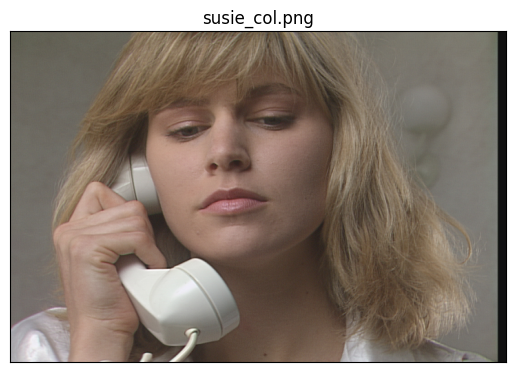

In [65]:
def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def plt_imshow(img, img_title="image"):
    plt.figure()
    plt.title(img_title)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()

image = load_image(IMAGE_PATH)
print(f"image, wymiary: {image.shape}, typ danych: {image.dtype}, wartości: {image.min()} - {image.max()}")
plt_imshow(image, img_title=IMAGE_PATH.split("\\").pop())

# Zadanie 1

Zrealizować operację filtracji barwnego obrazu cyfrowego.   
Do realizacji zadania wykorzystać obrazy zaszumione (szumem gaussowskim oraz impulsowym).  
Każdy z obrazów wejściowych poddać przetwarzaniu filtrem wygładzającym (Gaussa) i filtrem 
medianowym. Każdy obraz wynikowy wyświetlić i obliczyć dla niego PSNR (w stosunku do obrazu 
oryginalnego, nie zaszumionego!, funkcja do obliczania PSNR dostępna jest w przykładowym 
skrypcie). Ocenić działanie filtrów dla masek o rozmiarach: 3x3, 5x5, 7x7.  
Zebrać w tabeli PSNR dla różnych rodzajów szumów, filtrów i rozmiarów maski.  
1 
Jaki wpływ na skuteczność filtracji i na zniekształcenie obrazu ma rozmiar maski filtru?   
Czy ocena subiektywna uzyskanych obrazów wynikowych, jest zgodna z PSNR (lepsza jakość – 
większy PSNR)?   
Opisać wnioski w sprawozdaniu. 

In [66]:
MASK_SIZE_3X3 = 3
MASK_SIZE_5X5 = 5
MASK_SIZE_7X7 = 7

def add_gaussian_noise(img, mean = 0, std = 25):
    noise = np.random.normal(mean, std, img.shape).astype(np.int16)
    noisy_img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)
    return noisy_img

def add_impulse_noise(img):
    return img

def apply_gaussian_filter(img, size):
    return cv2.GaussianBlur(img, (size, size), 0)

def apply_median_filter(img, size):
    return cv2.medianBlur(img, size)

def calc_psnr(img1, img2):
    imax = 255.**2
    mse = ((img1.astype(np.float64)-img2)**2).sum()/img1.size
    return 10.0*np.log10(imax/mse)

psnrs_collected = dict()

def apply_filtration(img, noisy_img, filter_name, filter: callable):
    for size in MASK_SIZE_3X3, MASK_SIZE_5X5, MASK_SIZE_7X7:
        filtered_image = filter(noisy_img, size)
        psnr = calc_psnr(img, filtered_image)
        filter_title = f'{filter_name} {size}x{size}'

        psnrs_collected[filter_title] = psnr

        plt_imshow(filtered_image, f"{filter_title} (PSNR: {psnr:.2f} dB)")
        cv2.imwrite(f"{filter_name.split(" ")[0].capitalize()}{size}x{size}.png", filtered_image)






## Obraz zaszumiony szumem gaussowskim

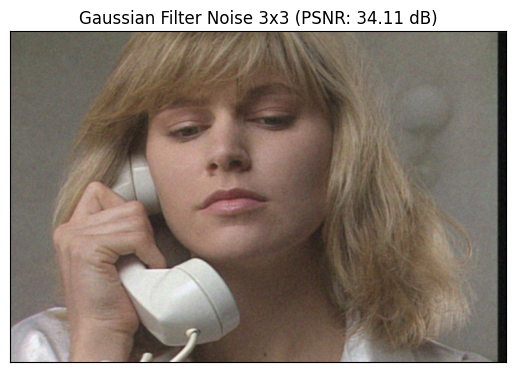

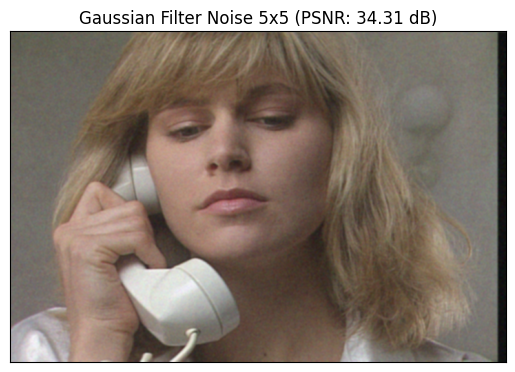

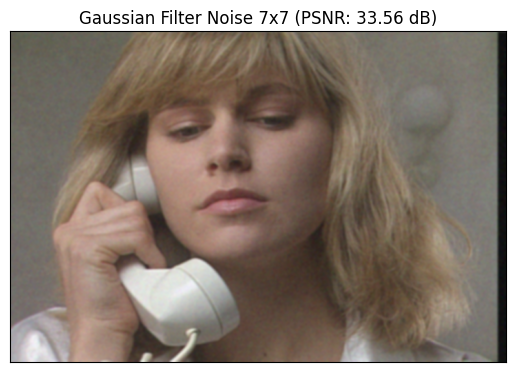

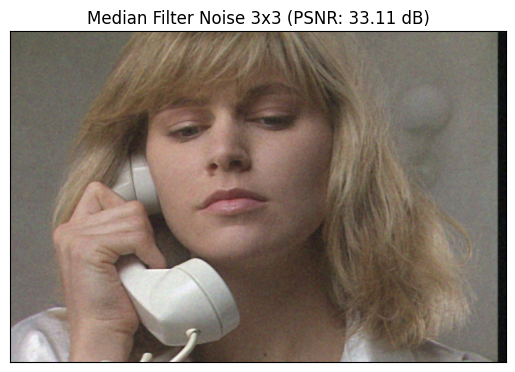

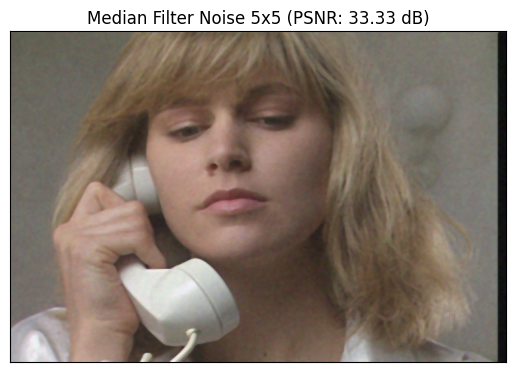

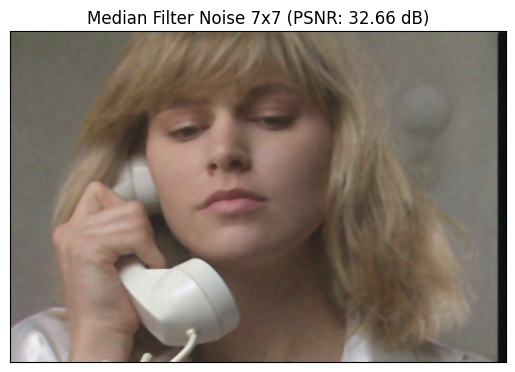

In [67]:
noisy_image = load_image(IMAGE_PATH_NOISE)

apply_filtration(image, noisy_image, "Gaussian Filter Noise", apply_gaussian_filter)

apply_filtration(image, noisy_image, "Median Filter Noise", apply_median_filter)


## Obraz zaszumiony szumem impulsowym 1

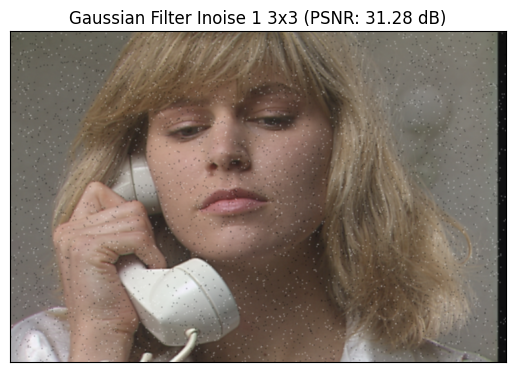

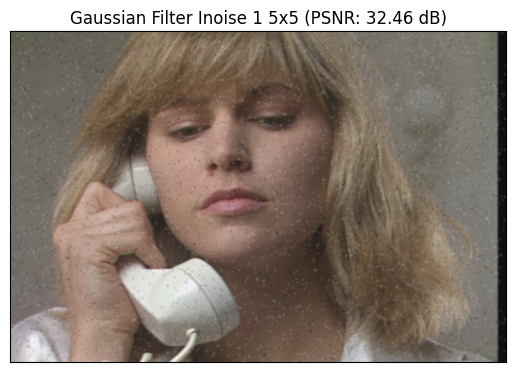

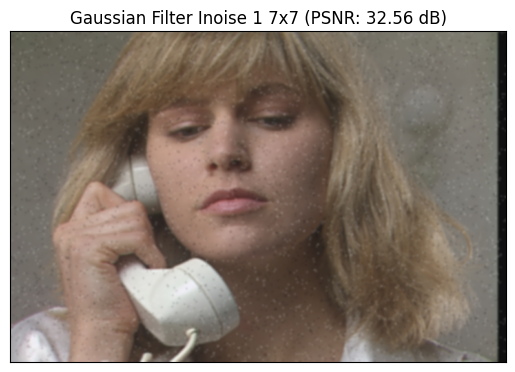

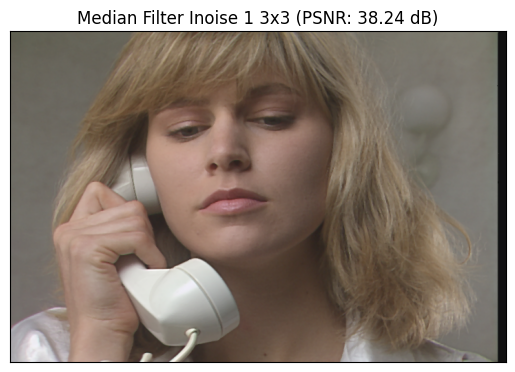

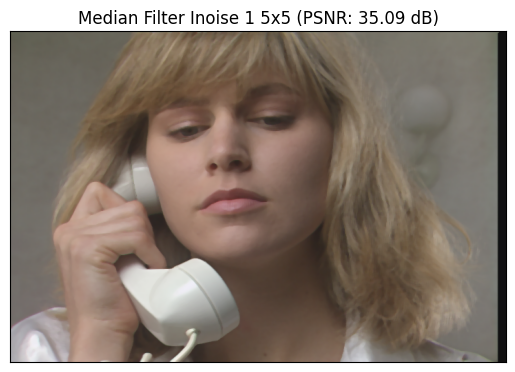

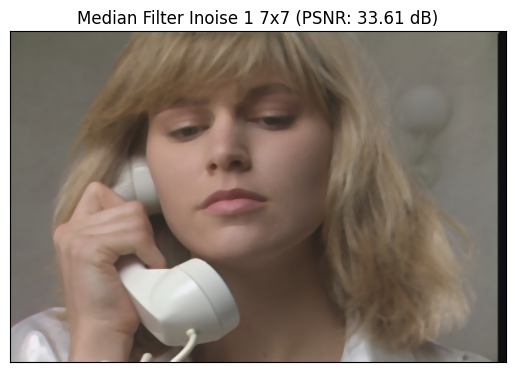

In [68]:
inoise_image_1 = load_image(IMAGE_PATH_INOISE1)

apply_filtration(image, inoise_image_1, "Gaussian Filter Inoise 1", apply_gaussian_filter)

apply_filtration(image, inoise_image_1, "Median Filter Inoise 1", apply_median_filter)

## Obraz zaszumiony szumem impulsowym 2

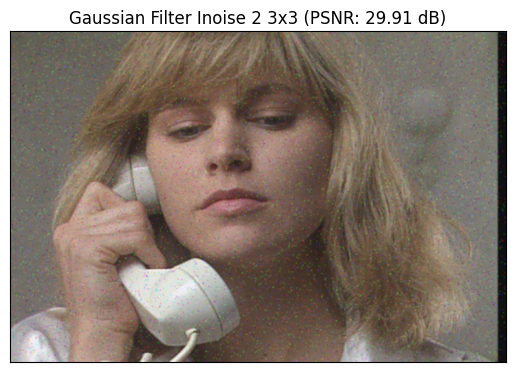

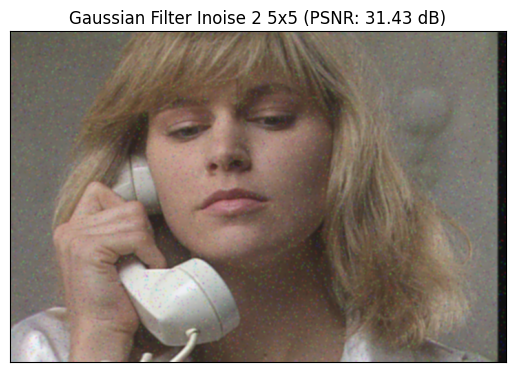

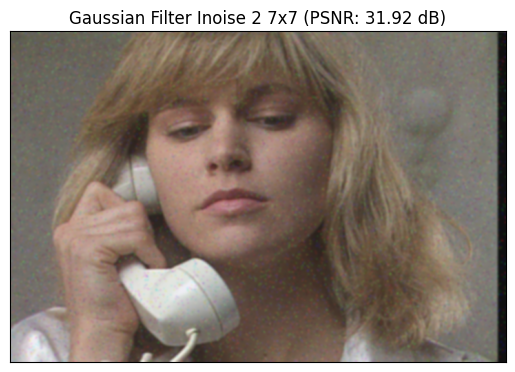

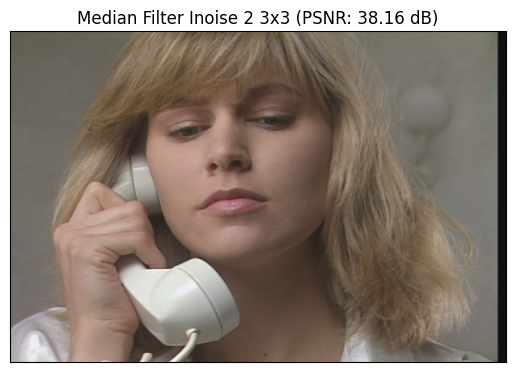

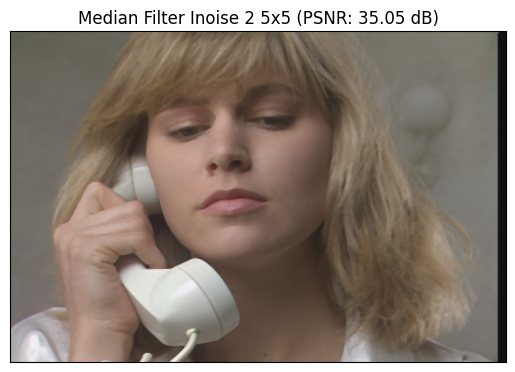

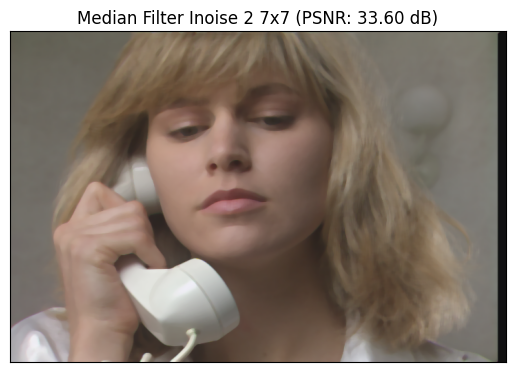

In [69]:
inoise_image_2 = load_image(IMAGE_PATH_INOISE2)

apply_filtration(image, inoise_image_2, "Gaussian Filter Inoise 2", apply_gaussian_filter)

apply_filtration(image, inoise_image_2, "Median Filter Inoise 2", apply_median_filter)

## Bez filtrów

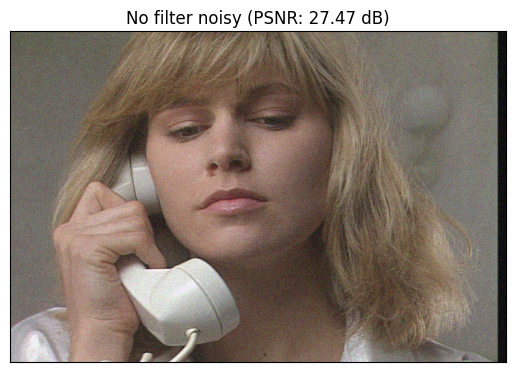

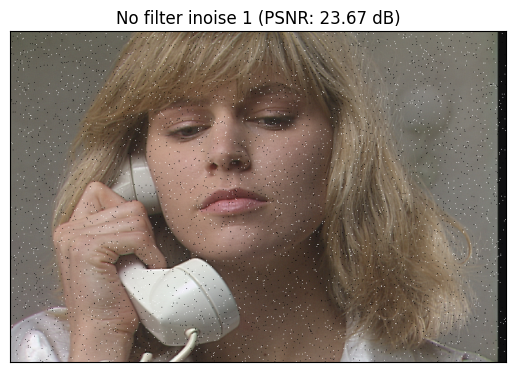

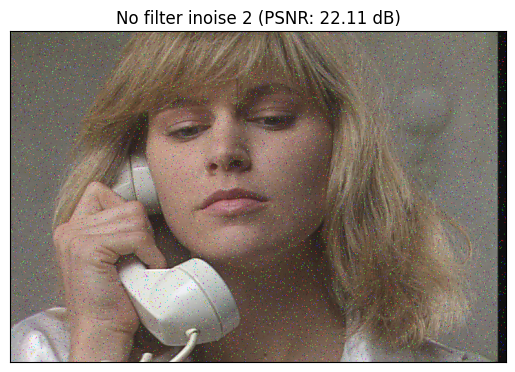

In [70]:
def no_filtration_psnr(img, noisy_img, operation_name):
    psnr = calc_psnr(img, noisy_img)
    psnrs_collected[operation_name] = psnr
    plt_imshow(noisy_img, f"{operation_name} (PSNR: {psnr:.2f} dB)")

no_filtration_psnr(image, noisy_image, 'No filter noisy')
no_filtration_psnr(image, inoise_image_1, 'No filter inoise 1')
no_filtration_psnr(image, inoise_image_2, 'No filter inoise 2')

In [ ]:
markdown_table = f"""
### Brak Filtrów

|     | noise              | inoise_1           | inoise_2           |
|-----|--------------------|--------------------|--------------------|
| -   | {psnrs_collected['No filter noisy']:.2f}  | {psnrs_collected['No filter inoise 1']:.2f}  | {psnrs_collected['No filter inoise 2']:.2f}  |

### Filtr Gaussa

|     | noise              | inoise_1           | inoise_2           |
|-----|--------------------|--------------------|--------------------|
| 3x3 | {psnrs_collected['Gaussian Filter Noise 3x3']:.2f}  | {psnrs_collected['Gaussian Filter Inoise 1 3x3']:.2f}  | {psnrs_collected['Gaussian Filter Inoise 2 3x3']:.2f}  |
| 5x5 | {psnrs_collected['Gaussian Filter Noise 5x5']:.2f}  | {psnrs_collected['Gaussian Filter Inoise 1 5x5']:.2f}  | {psnrs_collected['Gaussian Filter Inoise 2 5x5']:.2f}  |
| 7x7 | {psnrs_collected['Gaussian Filter Noise 7x7']:.2f}  | {psnrs_collected['Gaussian Filter Inoise 1 7x7']:.2f}  | {psnrs_collected['Gaussian Filter Inoise 2 7x7']:.2f}  |

### Filtr Medianowy

|     | noise              | inoise_1           | inoise_2           |
|-----|--------------------|--------------------|--------------------|
| 3x3 | {psnrs_collected['Median Filter Noise 3x3']:.2f}  | {psnrs_collected['Median Filter Inoise 1 3x3']:.2f}  | {psnrs_collected['Median Filter Inoise 2 3x3']:.2f}  |
| 5x5 | {psnrs_collected['Median Filter Noise 5x5']:.2f}  | {psnrs_collected['Median Filter Inoise 1 5x5']:.2f}  | {psnrs_collected['Median Filter Inoise 2 5x5']:.2f}  |
| 7x7 | {psnrs_collected['Median Filter Noise 7x7']:.2f}  | {psnrs_collected['Median Filter Inoise 1 7x7']:.2f}  | {psnrs_collected['Median Filter Inoise 2 7x7']:.2f}  |
"""

display(Markdown(markdown_table))

{'Gaussian Filter Noise 3x3': 34.10516279518014, 'Gaussian Filter Noise 5x5': 34.3126475749994, 'Gaussian Filter Noise 7x7': 33.56049681972258, 'Median Filter Noise 3x3': 33.106683893132306, 'Median Filter Noise 5x5': 33.33340515037107, 'Median Filter Noise 7x7': 32.6633768079536, 'Gaussian Filter Inoise 1 3x3': 31.275537983621934, 'Gaussian Filter Inoise 1 5x5': 32.464962457433735, 'Gaussian Filter Inoise 1 7x7': 32.56159068942487, 'Median Filter Inoise 1 3x3': 38.24370564682194, 'Median Filter Inoise 1 5x5': 35.09275583287652, 'Median Filter Inoise 1 7x7': 33.60665202616034, 'Gaussian Filter Inoise 2 3x3': 29.909593449328025, 'Gaussian Filter Inoise 2 5x5': 31.429979195205537, 'Gaussian Filter Inoise 2 7x7': 31.922539544815322, 'Median Filter Inoise 2 3x3': 38.1569304937364, 'Median Filter Inoise 2 5x5': 35.05466124171316, 'Median Filter Inoise 2 7x7': 33.603589066626505, 'No filter noisy': 27.469422600685466, 'No filter inoise 1': 23.674292621139152, 'No filter inoise 2': 22.1121513


### Brak Filtrów

|     | noise              | inoise_1           | inoise_2           |
|-----|--------------------|--------------------|--------------------|
| -   | 27.47  | 23.67  | 22.11  |

### Filtr Gaussa

|     | noise              | inoise_1           | inoise_2           |
|-----|--------------------|--------------------|--------------------|
| 3x3 | 34.11  | 31.28  | 29.91  |
| 5x5 | 34.31  | 32.46  | 31.43  |
| 7x7 | 33.56  | 32.56  | 31.92  |

### Filtr Medianowy

|     | noise              | inoise_1           | inoise_2           |
|-----|--------------------|--------------------|--------------------|
| 3x3 | 33.11  | 38.24  | 38.16  |
| 5x5 | 33.33  | 35.09  | 35.05  |
| 7x7 | 32.66  | 33.61  | 33.60  |


# Zadanie 2

Zrealizować operację wyrównania histogramu dla obrazu barwnego i zapisać obraz wynikowy do 
pliku. UWAGA: operację wyrównania histogramu należy wykonać wyłącznie dla składowej 
odpowiadającej za jasność, w tym celu należy wejściowy obraz RGB skonwertować do innej 
przestrzeni (np. YCbCr/YUV), a po wyrównaniu histogramu dla właściwej składowej powrócić do 
pierwotnego formatu.   
Porównać uzyskane obrazy i ich histogramy (w szczególności: histogram dla składowej, dla której 
wykonano operację wyrównywania histogramu).   
Czy obraz po wyrównaniu histogramu jest subiektywnie lepszej jakości? 

In [72]:
...

Ellipsis

# Zadanie 3

Korzystając z filtru Laplace’a do wyznaczenia wysokoczęstotliwościowych składowych obrazu 
dokonać wyostrzenia obrazu:  
``img_out = img_in + W*img_laplace.``   
Jaki jest wpływ wagi składowej wysokoczęstotliwościowej na postać obrazu wynikowego?   
Dla jakich wartości tej wagi uzyskuje się dobre, przyjemne dla oka wyniki?   
Uwaga: należy pamiętać, że wyostrzanie obrazu powoduje również uwydatnienie szumu w obrazie, w 
niektórych przypadkach (niezbyt dobrej jakości obrazów oryginalnych) przydatne może być wstępne 
wygładzenie obrazu filtrem dolnoprzepustowym (np. filtrem Gaussa).  
Wskazówka: wykorzystać funkcję cv2.addWeighted() do sumowania obrazów i równoczesnej 
konwersji wyniku do 8-bitowych liczb całkowitych z przedziału [0, 255].   
Uwaga: ze względu na sposób wyliczania laplasjanu w bibliotece OpenCV w celu uzyskania 
‘dobrych’ wyników należy odjąć ‘obraz wysokoczęstotliwościowy’, czyli zastosować ujemne 
wartości wagi W. 

In [73]:
...

Ellipsis